### 0. Setting

In [ ]:
#  한글깨짐 수정설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [120]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=True)

## 마실수 있는 물 검증
 1. 국가 수질측정망을 통한 데이터 수집

### 1. EDA

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
from google.colab import drive
## 구글드라이브 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## 데이터 위치 및 파일 리스트 획득
add ='/content/drive/MyDrive/CodeStates/section2/project/data/'
os.listdir(add)

['1121_수질측정망_2010_2011.csv',
 '1121_수질측정망_2011_2012.csv',
 '1121_수질측정망_2012_2013.csv',
 '1121_수질측정망_2013_2014.csv',
 '1121_수질측정망_2014.csv',
 '1121_수질측정망_2014_2015.csv',
 '1121_수질측정망_2015_2016.csv',
 '1121_수질측정망_2016_2017.csv',
 '1121_수질측정망_2020.csv']

In [5]:
## 리스트안의 모든 파일 결합
df = pd.DataFrame()
for n in os.listdir(add):
    data = pd.read_csv(add+n, names=['년도','월','회차','수질측정망_명','수질측정망_코드','검사일자','항목코드','항목명','값','항목정제여부','위도','경도','cat_id','cat_did'], encoding='cp949')
    df = df.append(data)

In [6]:
for n in df.columns:
    pd.to_numeric(df[n], errors='coerce')

In [7]:
df.sample(n=10, random_state=1)

년도   월  회차 수질측정망_명 수질측정망_코드      검사일자  항목코드                    항목명  \
370342  2011   8   1    동진강1  3302A05  20110804  1066             용존총질소(DTN)   
163582  2016   8   1      대암  2201A18  20160808  1059                     유량   
73673   2012   9  15    담양댐1  5001B20  20120912  1060                     수온   
231018  2011   4  15    아산호2  1101B90  20110414  1052         생물학적산소요구량(BOD)   
144112  2014   5  13    영암호2  5202B20  20140509  1060                     수온   
59333   2020   8   2     황강1  2015A50  20200824  1053               부유물질(SS)   
344454  2013  12   2    C대명천  2014E11  20131219  1059                     유량   
63046   2020   8  25    충주댐1  1003B40  20200810  1065             인산염(PO₄-P)   
308526  2015   6   1   보미저수지  3005D40  20150601  1063  클로로필-a(Chlorophyll-a)   
269196  2016  10   1    C외천천  3010E11  20161004  1049          화학적산소요구량(COD)   

             값  항목정제여부         위도          경도    cat_id     cat_did  
370342   2.632     NaN  35.616138  126.978277  33020208  3302020800  
163582     NaN     NaN  35.546902  129.184877  22010127  2201012700  
73673    8.700     NaN  35.377350  127.012200  50010101  5001010100  
231018   2.200     NaN  36.926611  126.961555  11011801  1101180100  
144112  17.200     NaN  34.709161  126.459300  52020211  5202021100  
59333    5.200     NaN  35.671516  127.941519  20150506  2015050600  
344454     NaN     NaN  35.817777  128.502777  20140101  2014010100  
63046      NaN     NaN  37.000700  127.996497  10031902  1003190203  
308526  54.900     NaN  36.363102  127.920636  30050202  3005020200  
269196   6.200     NaN  36.493916  127.403175  30100104  3010010400

In [8]:
df.duplicated(['년도','월','회차','수질측정망_명','수질측정망_코드','검사일자','항목코드']).value_counts()

False    3501312
dtype: int64

In [9]:
## 항목명(feature)에 대한 값 정리
df_temp = df.pivot(index=['년도','월','회차','검사일자','수질측정망_코드','수질측정망_명','위도','경도'], columns='항목명', values='값')
df_temp.head()

항목명                                                       부유물질(SS)  \
년도   월 회차 검사일자     수질측정망_코드 수질측정망_명 위도        경도                     
2010 9 1  20100901 2201A21  보은천     35.506908 129.145602       4.1   
                   2201A24  하잠교     35.524127 129.166402       4.4   
                   2201A27  작동교     35.518477 129.177022       2.9   
                   2201A31  대곡천1    35.682875 129.164394       1.8   
                   2201A33  대곡천2    35.610363 129.174911       4.2   

항목명                                                       생물학적산소요구량(BOD)  \
년도   월 회차 검사일자     수질측정망_코드 수질측정망_명 위도        경도                           
2010 9 1  20100901 2201A21  보은천     35.506908 129.145602             0.8   
                   2201A24  하잠교     35.524127 129.166402             0.9   
                   2201A27  작동교     35.518477 129.177022             1.0   
                   2201A31  대곡천1    35.682875 129.164394             0.8   
                   2201A33  대곡천2    35.610363 129.174911             1.2   

항목명                                                       수소이온농도(pH)    수온  \
년도   월 회차 검사일자     수질측정망_코드 수질측정망_명 위도        경도                             
2010 9 1  20100901 2201A21  보은천     35.506908 129.145602         7.8  29.0   
                   2201A24  하잠교     35.524127 129.166402         8.4  29.0   
                   2201A27  작동교     35.518477 129.177022         8.6  28.0   
                   2201A31  대곡천1    35.682875 129.164394         7.4  27.0   
                   2201A33  대곡천2    35.610363 129.174911         7.8  27.0   

항목명                                                       암모니아성질소(NH₃-N)  \
년도   월 회차 검사일자     수질측정망_코드 수질측정망_명 위도        경도                           
2010 9 1  20100901 2201A21  보은천     35.506908 129.145602             0.0   
                   2201A24  하잠교     35.524127 129.166402             0.0   
                   2201A27  작동교     35.518477 129.177022             0.0   
                   2201A31  대곡천1    35.682875 129.164394             0.0   
                   2201A33  대곡천2    35.610363 129.174911             0.0   

항목명                                                       용존산소(DO)  용존총인(DTP)  \
년도   월 회차 검사일자     수질측정망_코드 수질측정망_명 위도        경도                                
2010 9 1  20100901 2201A21  보은천     35.506908 129.145602       7.3      0.017   
                   2201A24  하잠교     35.524127 129.166402       9.9      0.027   
                   2201A27  작동교     35.518477 129.177022      10.4      0.018   
                   2201A31  대곡천1    35.682875 129.164394       8.2      0.016   
                   2201A33  대곡천2    35.610363 129.174911       8.4      0.015   

항목명                                                       용존총질소(DTN)   유량  \
년도   월 회차 검사일자     수질측정망_코드 수질측정망_명 위도        경도                            
2010 9 1  20100901 2201A21  보은천     35.506908 129.145602       1.309  0.0   
                   2201A24  하잠교     35.524127 129.166402       1.518  0.0   
                   2201A27  작동교     35.518477 129.177022       1.369  0.0   
                   2201A31  대곡천1    35.682875 129.164394       1.661  0.0   
                   2201A33  대곡천2    35.610363 129.174911       1.289  0.0   

항목명                                                       인산염(PO₄-P)  \
년도   월 회차 검사일자     수질측정망_코드 수질측정망_명 위도        경도                       
2010 9 1  20100901 2201A21  보은천     35.506908 129.145602       0.013   
                   2201A24  하잠교     35.524127 129.166402       0.019   
                   2201A27  작동교     35.518477 129.177022       0.013   
                   2201A31  대곡천1    35.682875 129.164394       0.011   
                   2201A33  대곡천2    35.610363 129.174911       0.011   

항목명                                                       전기전도도(EC)  \
년도   월 회차 검사일자     수질측정망_코드 수질측정망_명 위도        경도                      
2010 9 1  20100901 2201A21  보은천     35.506908 129.145602      177.0   
                   2201A24  하잠교     35.524127 129.166402      192.0   

In [10]:
df_temp.reset_index(inplace=True)

In [11]:
df_temp.sample(n=10, random_state=1)

항목명       년도   월  회차      검사일자 수질측정망_코드 수질측정망_명         위도          경도  \
77666   2013   6   2  20130610  5004A17    장성천2  35.055277  126.741388   
18909   2011   7   1  20110705  1010A35     춘천A  37.965333  127.671527   
117550  2014   9   1  20140901  3302A40    동진강3  35.714238  126.819427   
201066  2020   8   1  20200814  3301A57     용암천  35.873150  126.940952   
175479  2016   5   4  20160524  4009A20      계산  35.183252  127.411341   
151798  2015   9   2  20150909  2011A23     경호천  36.060166  128.298858   
35494   2012   2   1  20120216  1006A15     계천1  37.536158  128.101966   
188184  2016   9   4  20160927  3009A80   갑천5-1  36.452066  127.402530   
126143  2014  12   1  20141203  2302A20    수영강5  35.163130  129.128900   
171001  2016   4   1  20160414  3009A50    대전천1  36.315047  127.439430   

항목명     부유물질(SS)  생물학적산소요구량(BOD)  ...  용존총질소(DTN)       유량  인산염(PO₄-P)  \
77666       30.0             6.7  ...       2.292    1.595       0.079   
18909        7.6             0.7  ...         NaN  294.000         NaN   
117550      14.8             2.0  ...       2.601   19.483       0.056   
201066      40.4             3.3  ...       4.222      NaN       0.382   
175479       4.0             1.4  ...         NaN   19.609         NaN   
151798      26.8             0.7  ...         NaN    0.003         NaN   
35494        0.5             0.4  ...       3.015      NaN       0.001   
188184      26.3             4.8  ...       3.428   63.443       0.084   
126143       3.8             1.2  ...       4.908      NaN       0.272   
171001       2.0             1.7  ...       3.232      NaN       0.009   

항목명     전기전도도(EC)  질산성질소(NO₃-N)  총유기탄소(TOC)  총인(T-P)  총질소(T-N)  \
77666       205.0        1.2805         7.2    0.111     2.296   
18909        82.0           NaN         1.9    0.039     2.008   
117550      151.0        2.4000         3.3    0.099     2.606   
201066      217.0        2.6710         5.2    0.387     4.448   
175479      136.0           NaN         3.3    0.083     1.619   
151798      365.0           NaN         3.0    0.426     6.467   
35494       112.0        2.6730         NaN    0.010     3.020   
188184      342.0        2.1540         6.4    0.436     3.772   
126143    35500.0        2.4800         2.4    0.310     5.089   
171001      324.0        1.9530         1.2    0.014     3.288   

항목명     클로로필-a(Chlorophyll-a)  화학적산소요구량(COD)  
77666                     3.4           12.5  
18909                     NaN            2.3  
117550                   10.0            5.3  
201066                   23.1           11.6  
175479                    2.1            4.6  
151798                    2.7            5.6  
35494                     0.9            1.0  
188184                   51.5           11.0  
126143                    1.4            5.5  
171001                    3.1            2.7  

[10 rows x 25 columns]

### 2. Feature engineering

In [12]:
df_temp.columns

Index(['년도', '월', '회차', '검사일자', '수질측정망_코드', '수질측정망_명', '위도', '경도', '부유물질(SS)',
       '생물학적산소요구량(BOD)', '수소이온농도(pH)', '수온', '암모니아성질소(NH₃-N)', '용존산소(DO)',
       '용존총인(DTP)', '용존총질소(DTN)', '유량', '인산염(PO₄-P)', '전기전도도(EC)',
       '질산성질소(NO₃-N)', '총유기탄소(TOC)', '총인(T-P)', '총질소(T-N)',
       '클로로필-a(Chlorophyll-a)', '화학적산소요구량(COD)'],
      dtype='object', name='항목명')

In [13]:
## target 값 지정
conditionlist = [
    (df_temp['수소이온농도(pH)'] >= 6.5) & (df_temp['생물학적산소요구량(BOD)'] <= 1) & (df_temp['화학적산소요구량(COD)'] <= 2) & (df_temp['총유기탄소(TOC)'] <= 2) & 
    (df_temp['부유물질(SS)'] <= 22) & (df_temp['용존산소(DO)'] >= 7.5) & (df_temp['총인(T-P)'] <= 0.02),
    (df_temp['수소이온농도(pH)'] >= 6.5) & (df_temp['생물학적산소요구량(BOD)'] <= 2) & (df_temp['화학적산소요구량(COD)'] <= 4) & (df_temp['총유기탄소(TOC)'] <= 3) & 
    (df_temp['부유물질(SS)'] <= 25) & (df_temp['용존산소(DO)'] >= 5) & (df_temp['총인(T-P)'] <= 0.04),
    (df_temp['수소이온농도(pH)'] >= 6.5) & (df_temp['생물학적산소요구량(BOD)'] <= 3) & (df_temp['화학적산소요구량(COD)'] <= 5) & (df_temp['총유기탄소(TOC)'] <= 4) & 
    (df_temp['부유물질(SS)'] <= 25) & (df_temp['용존산소(DO)'] >= 5) & (df_temp['총인(T-P)'] <= 0.1),
    (df_temp['수소이온농도(pH)'] >= 6.5) & (df_temp['생물학적산소요구량(BOD)'] <= 5) & (df_temp['화학적산소요구량(COD)'] <= 7) & (df_temp['총유기탄소(TOC)'] <= 5) & 
    (df_temp['부유물질(SS)'] <= 25) & (df_temp['용존산소(DO)'] >= 5) & (df_temp['총인(T-P)'] <= 0.2),
    (df_temp['수소이온농도(pH)'] >= 6) & (df_temp['생물학적산소요구량(BOD)'] <= 8) & (df_temp['화학적산소요구량(COD)'] <= 9) & (df_temp['총유기탄소(TOC)'] <= 6) & 
    (df_temp['부유물질(SS)'] <= 100) & (df_temp['용존산소(DO)'] >= 2) & (df_temp['총인(T-P)'] <= 0.3),
    (df_temp['수소이온농도(pH)'] >= 6) & (df_temp['생물학적산소요구량(BOD)'] <= 10) & (df_temp['화학적산소요구량(COD)'] <= 11) & (df_temp['총유기탄소(TOC)'] <= 8) & 
    (df_temp['용존산소(DO)'] >= 2) & (df_temp['총인(T-P)'] <= 0.5),
    (df_temp['생물학적산소요구량(BOD)'] > 10) & (df_temp['화학적산소요구량(COD)'] > 11) & (df_temp['총유기탄소(TOC)'] > 8) & 
    (df_temp['용존산소(DO)'] < 2) & (df_temp['총인(T-P)'] > 0.5),
    (df_temp['수소이온농도(pH)'] < 6) | (df_temp['수소이온농도(pH)'] > 8.5) | (df_temp['생물학적산소요구량(BOD)'] > 10) | (df_temp['화학적산소요구량(COD)'] > 11) |
    (df_temp['부유물질(SS)'] > 100) | (df_temp['용존산소(DO)'] < 2) | (df_temp['총인(T-P)'] > 0.5)
    ]
choicelist = ['매우좋음', '좋음', '약간좋음', '보통', '약간나쁨', '나쁨', '매우나쁨', '매우나쁨']
df_temp['등급'] = np.select(conditionlist, choicelist, default='삭제')

In [14]:
df_temp['등급'].value_counts()

좋음      51613
약간좋음    34862
보통      30390
삭제      29928
약간나쁨    24658
매우나쁨    16969
나쁨      11365
매우좋음     6175
Name: 등급, dtype: int64

### 3. Target, feature 정리

- 등급에서 '삭제' 대상인 것들을 추림 (등급을 확인할 수 없는 항은 제거)
- 음용가능/불가능 이진 분류로 타겟 정리
- Target에 영향을 준 feature 제거 (정보누수 차단)

In [15]:
len(df_temp)

205960

In [16]:
len(df_temp[df_temp['등급']=='삭제'])

29928

In [17]:
drop_idx = df_temp[df_temp['등급']=='삭제'].index
df_temp = df_temp.drop(drop_idx)

In [18]:
len(df_temp)

176032

In [19]:
## 매우좋음, 좋음, 약간좋음은 음용가능으로 판단(이진분류)
df_temp['음용가능'] = (df_temp['등급'] == '매우좋음') | (df_temp['등급'] == '약간좋음') | (df_temp['등급'] == '좋음')
df_temp['음용가능'].value_counts()

True     92650
False    83382
Name: 음용가능, dtype: int64

In [20]:
## 필요없는 feature 제거
df_temp.drop(['등급'],axis=1,inplace=True)
df_temp.drop(['수소이온농도(pH)','생물학적산소요구량(BOD)','화학적산소요구량(COD)','총유기탄소(TOC)',
              '부유물질(SS)','용존산소(DO)','총인(T-P)'],axis=1,inplace=True) ##'클로로필-a(Chlorophyll-a)','용존총인(DTP)'

In [21]:
df_temp.shape

(176032, 19)

### 4. Train, test 데이터 및 target, feature 분리

In [22]:
df = df_temp

In [23]:
from sklearn.model_selection import train_test_split
target='음용가능'
train, test = train_test_split(df, test_size=0.2, stratify = df[target], random_state=2)
#train, val = train_test_split(train, test_size=len(test), stratify = train[target], random_state=2)

In [24]:
train.shape, test.shape #val.shape, 

((140825, 19), (35207, 19))

In [25]:
def divide_data(df):
    X = None
    y = None
    
    y = df[target]
    X = df.drop(target, axis=1)

    return X, y

In [26]:
X_train, y_train = divide_data(train)
#X_val, y_val = divide_data(val)
X_test, y_test = divide_data(test)

In [27]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) #X_val.shape, y_val.shape, 

(140825, 18) (140825,) (35207, 18) (35207,)


In [28]:
X_train.head()

항목명       년도   월  회차      검사일자 수질측정망_코드 수질측정망_명         위도          경도    수온  \
95513   2014   1   1  20140106  2004A93      금천  36.576850  128.285597   2.3   
92727   2013  11  11  20131104  1012B10   소양강댐4  38.006313  128.099586  17.0   
2647    2010  10   3  20101026  4008A20   보성천-1  35.192694  127.376083  14.0   
102230  2014   3   3  20140319  1012A40    소양강2  37.926000  127.792333   5.3   
153964  2015  10   1  20151006  2002A30    용전천1  36.487963  129.005191  20.0   

항목명     암모니아성질소(NH₃-N)  용존총인(DTP)  용존총질소(DTN)      유량  인산염(PO₄-P)  전기전도도(EC)  \
95513              NaN        NaN         NaN   0.626         NaN      228.0   
92727            0.028      0.018       1.713     NaN       0.003       53.0   
2647             0.066      0.008       0.952     NaN       0.003      154.0   
102230           0.013      0.005       1.503  65.000       0.001       68.0   
153964           0.020      0.013       1.098   0.000       0.011      189.0   

항목명     질산성질소(NO₃-N)  총질소(T-N)  클로로필-a(Chlorophyll-a)  
95513            NaN     5.207                    3.8  
92727         1.5570     2.232                    4.7  
2647          0.7200     0.989                    2.4  
102230        0.9616     1.511                    3.1  
153964        0.9000     1.231                    1.6

### 5. 기준 모델

In [78]:
## 다수범주(음용가능)가 약 52.63%
y_test.value_counts(normalize=True) 

True     0.526316
False    0.473684
Name: 음용가능, dtype: float64

In [79]:
!pip install category_encoders

In [80]:
from sklearn.metrics import f1_score

In [81]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(), 
    XGBClassifier(random_state=42, n_jobs=-1)
)

pipe.fit(X_train, y_train)

print(' 훈련  정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

 훈련  정확도:  0.8452689508254926
테스트 정확도:  0.8482688101797938


- 기준모델 : 52.63% (다수범주로 예측)
- XGB분류모델 : 
 >  훈련  정확도 : 84.53% \
 > 테스트 정확도 : 84.83%
- 사용된 XGB분류 모델은 과소, 과대 적합도 아니고, 기준모델보다 뛰어난 성능을 갖음.
- 다만 데이터 누수가 있는지 확인해 볼 필요가 있음

### 6. XGB분류모델 학습 및 RandomizedSearchCV를 이용한 하이파라미터 조정

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform


def fit(X_train, y_train):
    pipeline = None # pipeline = make_pipeline(...)
    clf = None  # clf = RandomizedSearchCV(pipeline, ...)

    pipeline = make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        XGBClassifier(random_state=42, 
                      booster='gbtree', 
                      silent=False,
                      n_jobs=-1)
    )
                  
    dists = {
        'simpleimputer__strategy': ['mean','median','most_frequent'],  #'mean', 'median', 'most_frequent'
        'xgbclassifier__n_estimators': randint(50, 100), # 200, 300
        'xgbclassifier__max_depth': [30, 50, 100],
        'xgbclassifier__subsample': [0.6, 0.8, 1],
        'xgbclassifier__colsample_bytree': [0.5, 0.6, 0.7],
        'xgbclassifier__colsample_bylevel': [0.5, 0.6, 0.7],
        'xgbclassifier__min_child_weight': [1, 2, 3, 4, 5],
        'xgbclassifier__learning_rate':  [0.0001, 0.001, 0.1, 1],
        'xgbclassifier__gamma': [0, 0.5, 1, 5],
        'xgbclassifier__reg_alpha': [0.001, 0.1, 1],
        'xgbclassifier__reg_lambda': [0.001, 0.1, 1]
    }

    clf = RandomizedSearchCV(
        pipeline, 
        param_distributions=dists, 
        n_iter=5, 
        cv=3,
        scoring='accuracy',
        verbose=3,
        n_jobs=-1
    )

    clf.fit(X_train, y_train)
    
    print("Optimal Hyperparameter:", clf.best_params_)
    print("accuracy:", clf.best_score_)

    return clf


In [34]:
clf = fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Optimal Hyperparameter: {'simpleimputer__strategy': 'most_frequent', 'xgbclassifier__colsample_bylevel': 0.6, 'xgbclassifier__colsample_bytree': 0.5, 'xgbclassifier__gamma': 1, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 100, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__n_estimators': 95, 'xgbclassifier__reg_alpha': 1, 'xgbclassifier__reg_lambda': 0.1, 'xgbclassifier__subsample': 0.6}
accuracy: 0.8917379723476376


In [35]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

2  \
mean_fit_time                                                                   53.470951   
std_fit_time                                                                     0.896037   
mean_score_time                                                                    1.8028   
std_score_time                                                                    0.43682   
param_simpleimputer__strategy                                               most_frequent   
param_xgbclassifier__colsample_bylevel                                                0.6   
param_xgbclassifier__colsample_bytree                                                 0.5   
param_xgbclassifier__gamma                                                              1   
param_xgbclassifier__learning_rate                                                    0.1   
param_xgbclassifier__max_depth                                                        100   
param_xgbclassifier__min_child_weight                                                   5   
param_xgbclassifier__n_estimators                                                      95   
param_xgbclassifier__reg_alpha                                                          1   
param_xgbclassifier__reg_lambda                                                       0.1   
param_xgbclassifier__subsample                                                        0.6   
params                                  {'simpleimputer__strategy': 'most_frequent', '...   
split0_test_score                                                                0.892271   
split1_test_score                                                                0.891249   
split2_test_score                                                                0.891694   
mean_test_score                                                                  0.891738   
std_test_score                                                                   0.000419   
rank_test_score                                                                         1   

                                                                                        1  \
mean_fit_time                                                                   64.275041   
std_fit_time                                                                     0.552262   
mean_score_time                                                                  2.895567   
std_score_time                                                                    0.05903   
param_simpleimputer__strategy                                                      median   
param_xgbclassifier__colsample_bylevel                                                0.7   
param_xgbclassifier__colsample_bytree                                                 0.6   
param_xgbclassifier__gamma                                                              1   
param_xgbclassifier__learning_rate                                                 0.0001   
param_xgbclassifier__max_depth                                                         30   
param_xgbclassifier__min_child_weight                                                   3   
param_xgbclassifier__n_estimators                                                      81   
param_xgbclassifier__reg_alpha                                                        0.1   
param_xgbclassifier__reg_lambda                                                     0.001   
param_xgbclassifier__subsample                                                          1   
params                                  {'simpleimputer__strategy': 'median', 'xgbclas...   
split0_test_score                                                                0.880789   
split1_test_score                                                                0.881151   
split2_test_score                                                                0.879615   
mean_test_score                                                                  0.88051

              precision    recall  f1-score   support

       False       0.91      0.87      0.89     16677
        True       0.89      0.92      0.91     18530

    accuracy                           0.90     35207
   macro avg       0.90      0.90      0.90     35207
weighted avg       0.90      0.90      0.90     35207



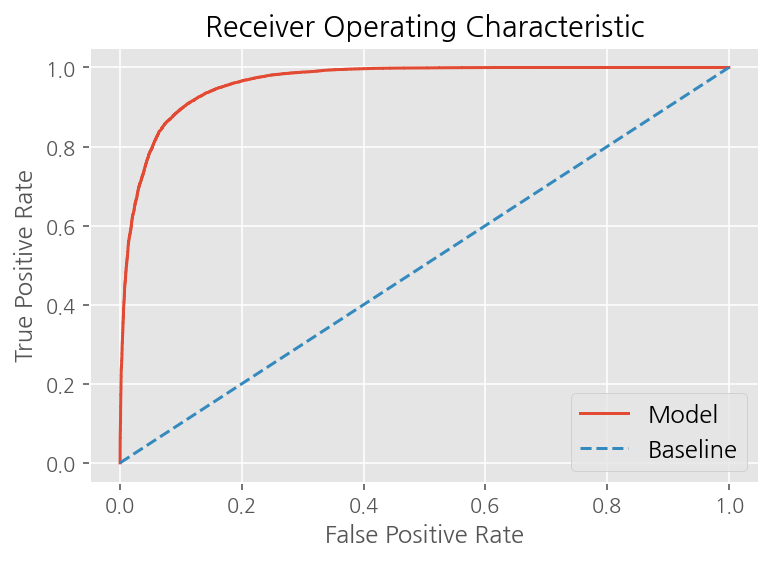

In [36]:
import warnings
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

def predict(X, y, best_estimator):
    y_pred_proba = None

    pipeline = best_estimator
    y_pred_proba = pipeline.predict_proba(X)[:, 1]
    
    report = classification_report(y, y_pred_proba > 0.5)
    return y_pred_proba, report

def plot_roc(y, y_pred_proba):
    auc_score = roc_auc_score(y, y_pred_proba)
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    baseline_fpr, baseline_tpr, _ = roc_curve(y, [0] * len(y))

    plt.style.use("ggplot")
    plt.plot(fpr, tpr, label="Model")
    plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
    plt.xlabel("False Positive Rate", size=12)
    plt.ylabel("True Positive Rate", size=12)
    plt.title("Receiver Operating Characteristic")
    plt.legend(prop={"size": 12})
    plt.show()
    return auc_score


y_test_pred_proba, report = predict(X_test, y_test, clf.best_estimator_)
print(report)
auc_score = plot_roc(y_test, y_test_pred_proba)

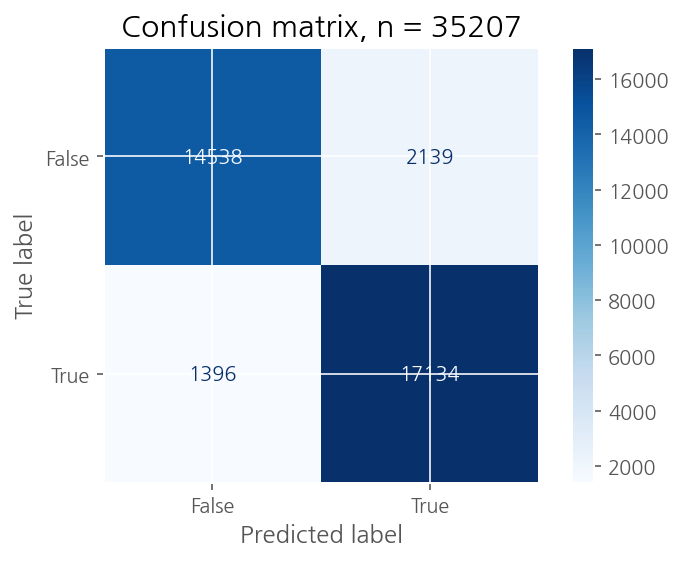

In [37]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def conf_m(clf, X_test, y_test):
    fig, ax = plt.subplots()
    pcm = plot_confusion_matrix(clf, X_test, y_test,
                                cmap=plt.cm.Blues,
                                ax=ax);
    plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
    plt.show()

conf_m(clf, X_test, y_test)

- 하이퍼파라미터 조정시:
>  훈련  정확도 : 88.98%\
> 테스트 정확도 : 90%
- 하이퍼파라미터 조정을 통해 정확도가 소폭 상승
- Confusion matrix를 통해 TP, TN을 높은 수준으로 예측하였음

### 7. 순열중요도

In [ ]:
!pip install eli5

In [133]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('XGBC', XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)) 
])

In [134]:
pipe.fit(X_train, y_train)
print('테스트 정확도: ', pipe.score(X_test, y_test))

테스트 정확도:  0.8482688101797938


In [135]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['XGBC'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_test을 사용합니다.
X_test_transformed = pipe.named_steps['preprocessing'].transform(X_test)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test_transformed, y_test); 

In [136]:
# 특성별 score 확인
feature_names = X_test.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
) 

- 순열 중요도를 파악한 결과 클로로필-a, 전기전도도, 용존총인이 정확도를 올리는 주요 요인으로 파악

- 정보누수 확인:
 > **'용존총인'** 은 물에 용해되어 있는 인의 양으로, target 선정시 변수인 총인과 연관이 있어보임 >> **삭제**\
 > **'클로로필-a'** 는 화학적산소요구량(COD)와 상관관계가 있음 >> **삭제**\
 > **'전기전도도'** 가 0에 가까울수록 증류수 이며 높을수로 물안에 이온이 많다는 말이므로, 전기전도도 수치가 높다고 오염된 물은 아니며 물속에 용해되어있는 물질을 파악해야함 >> **유지**
 

### 8. 정보누수 확인

In [137]:
df.head()

항목명    년도  월  회차      검사일자 수질측정망_코드 수질측정망_명         위도          경도    수온  \
2    2010  9   1  20100901  2201A27     작동교  35.518477  129.177022  28.0   
6    2010  9   1  20100901  2403D50   오어저수지  35.926433  129.376055  21.0   
8    2010  9   1  20100901  2501A30     사천천  35.577847  127.991055  29.0   
10   2010  9   1  20100901  2501D20   양화저수지  35.009641  128.287475  21.0   
14   2010  9   1  20100901  2504A20     내동천  35.237677  128.632936  28.0   

항목명  암모니아성질소(NH₃-N)  용존총인(DTP)  용존총질소(DTN)   유량  인산염(PO₄-P)  전기전도도(EC)  \
2             0.000      0.018       1.369  0.0       0.013      189.0   
6               NaN        NaN         NaN  NaN         NaN       75.0   
8             0.028      0.034       0.870  NaN       0.021      146.0   
10              NaN        NaN         NaN  NaN         NaN       60.0   
14            0.016      0.475       4.646  NaN       0.465      742.0   

항목명  질산성질소(NO₃-N)  총질소(T-N)  클로로필-a(Chlorophyll-a)   음용가능  
2          0.9130     1.521                 3.2000  False  
6             NaN     0.793                 1.6000  False  
8          0.7271     1.047                 4.5754  False  
10            NaN     0.988                 9.6000  False  
14         0.1563     5.991                36.4369  False

In [138]:
X_train2 = X_train.drop(['클로로필-a(Chlorophyll-a)', '용존총인(DTP)'],axis=1) #, '총질소(T-N)','용존총질소(DTN)'
X_test2 = X_test.drop(['클로로필-a(Chlorophyll-a)', '용존총인(DTP)'],axis=1) #, '총질소(T-N)','용존총질소(DTN)'

- XGB분류모델 학습 및 RandomizedSearchCV를 이용한 하이파라미터 조정
 > 훈련 정확도 : 88.35% \
 > 테스트 정확도 : 89%

In [139]:
clf2 = fit(X_train2, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Optimal Hyperparameter: {'simpleimputer__strategy': 'mean', 'xgbclassifier__colsample_bylevel': 0.6, 'xgbclassifier__colsample_bytree': 0.5, 'xgbclassifier__gamma': 1, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 30, 'xgbclassifier__min_child_weight': 2, 'xgbclassifier__n_estimators': 93, 'xgbclassifier__reg_alpha': 1, 'xgbclassifier__reg_lambda': 1, 'xgbclassifier__subsample': 1}
accuracy: 0.8877755963647135


              precision    recall  f1-score   support

       False       0.91      0.87      0.89     16677
        True       0.89      0.92      0.90     18530

    accuracy                           0.90     35207
   macro avg       0.90      0.89      0.89     35207
weighted avg       0.90      0.90      0.90     35207



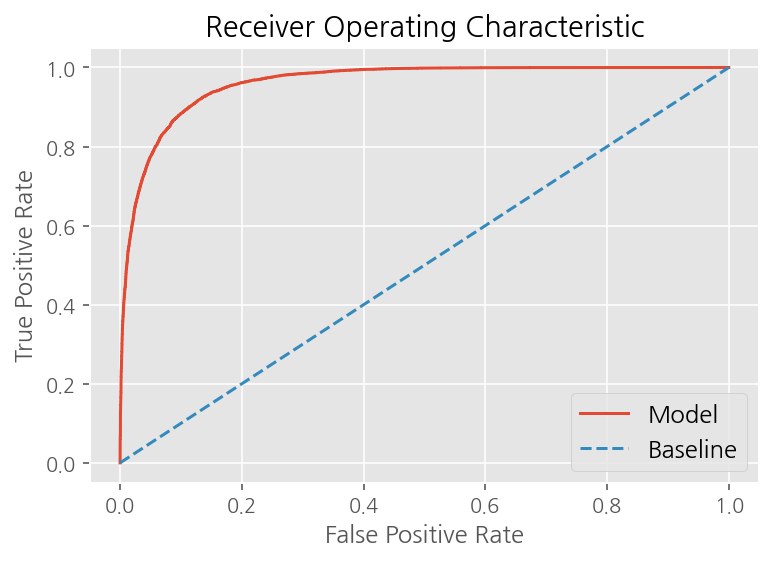

In [140]:
y_test2_pred_proba, report = predict(X_test2, y_test, clf2.best_estimator_)
print(report)
auc_score = plot_roc(y_test, y_test2_pred_proba)

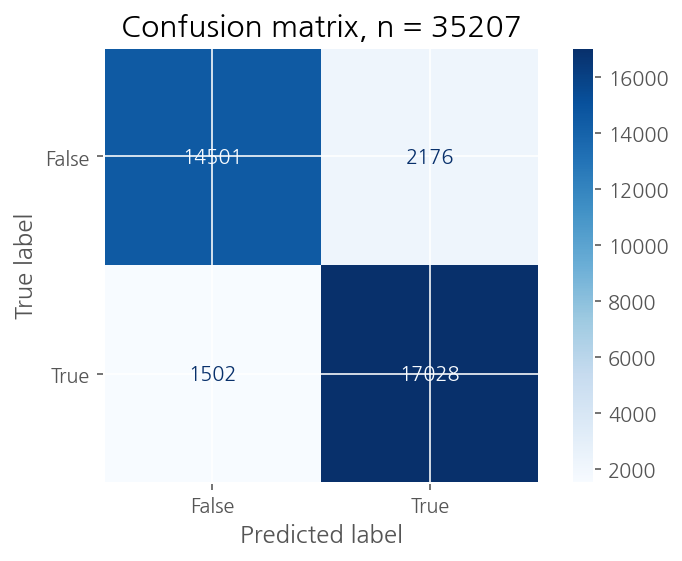

In [141]:
conf_m(clf2, X_test2, y_test)

- 순열중요도

In [142]:
pipe.fit(X_train2, y_train);
X_test2_transformed = pipe.named_steps['preprocessing'].transform(X_test2)
permuter.fit(X_test2_transformed, y_test); 

In [143]:
# 특성별 score 확인
feature_names = X_test2.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
) 

### 9. 특성들의 기여도(feature attribution) 확인

In [ ]:
!pip install shap
#shap.initjs()

In [144]:
import shap
from sklearn.metrics import roc_auc_score

In [145]:
# 클래스의 비율
y_train.value_counts(normalize=True)

True     0.526327
False    0.473673
Name: 음용가능, dtype: float64

In [146]:
ratio = y_train.value_counts(normalize=True)[0]/y_train.value_counts(normalize=True)[1]
ratio

0.8999595250944414

In [147]:
from sklearn.metrics import roc_auc_score
X_test2_transformed = pipe.named_steps['preprocessing'].transform(X_test2)
class_index = 1

# XGBC에 ratio 추가
pipe.named_steps['XGBC'].scale_pos_weight=ratio

model = pipe.named_steps['XGBC']
y_pred_proba = model.predict_proba(X_test2_transformed)[:, class_index]
print(f'Test accuracy for class "{model.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba)) # 범위는 0-1, 수치는 높을 수록 좋습니다

Test accuracy for class "True":
0.9040648208795922


In [148]:
y_pred_proba

array([0.545646  , 0.58521813, 0.8909488 , ..., 0.33812726, 0.19253154,
       0.5824495 ], dtype=float32)

In [149]:
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test2_transformed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.85      0.76      0.80     16677
        True       0.80      0.88      0.84     18530

    accuracy                           0.82     35207
   macro avg       0.83      0.82      0.82     35207
weighted avg       0.82      0.82      0.82     35207



In [150]:
df_p = pd.DataFrame({
    'pred_proba': y_pred_proba, # 예측확률 
    'status_group': y_test # 실제값
})

df_p = pd.merge(df_p, X_test2, left_index=True, right_index=True, how='left')

In [151]:
pred_True = df_p['status_group'] == True
pred_False = ~pred_True
right = (pred_True) == (df_p['pred_proba'] > 0.50)
wrong = ~right

In [152]:
df_p[pred_True & right].sample(n=10, random_state=1).sort_values(by='pred_proba')

pred_proba  status_group    년도   월  회차      검사일자 수질측정망_코드 수질측정망_명  \
158865    0.760358          True  2015  11  11  20151103  2201B30    사연댐2   
110461    0.781686          True  2014   6   2  20140617  1002A55  평창강3-1   
128823    0.863750          True  2015   1   2  20150112  1003A05     영월2   
5292      0.875042          True  2010  12   1  20101201  1003A75      충주   
127277    0.898594          True  2014  12   4  20141222  1003A05     영월2   
121507    0.898750          True  2014  10   2  20141015  1002A55  평창강3-1   
33847     0.907134          True  2012   1   2  20120117  5101A15   유치천-1   
98776     0.910904          True  2014   2   2  20140211  3002A40      용담   
124910    0.919389          True  2014  11   3  20141119  2021A35    단장천2   
65563     0.941534          True  2013   2   1  20130204  4001A10      관촌   

               위도          경도    수온  암모니아성질소(NH₃-N)  용존총질소(DTN)       유량  \
158865  35.586694  129.189194  15.0           0.030       0.345      NaN   
110461  37.168472  128.457583  25.4           0.019       1.455   6.5190   
128823  37.160222  128.495805   1.8           0.097       3.304      NaN   
5292    37.009222  127.981805  13.0           0.018       2.135      NaN   
127277  37.160222  128.495805   0.9           0.036       3.352      NaN   
121507  37.168472  128.457583  16.2           0.019       2.512   7.8100   
33847   34.803536  126.798216   2.5             NaN         NaN   0.0312   
98776   35.967875  127.537066   4.2             NaN         NaN  13.3770   
124910  35.458716  126.967238  14.5             NaN         NaN   0.0010   
65563   35.707430  127.294944   3.1           0.032       2.272  12.8030   

        인산염(PO₄-P)  전기전도도(EC)  질산성질소(NO₃-N)  총질소(T-N)  
158865       0.012      147.0        0.1100     0.876  
110461       0.000      245.0        0.9705     1.590  
128823       0.004      317.0        3.0880     3.458  
5292         0.006      245.0        1.8752     2.182  
127277       0.005      319.0        3.2540     3.442  
121507       0.001      262.0        2.2300     2.515  
33847          NaN       93.0           NaN     1.207  
98776          NaN      108.0           NaN     1.602  
124910         NaN       44.0           NaN     0.816  
65563        0.000      105.0        2.1694     2.352

In [158]:
row = X_test2.loc[[81224]]
row

항목명      년도  월  회차      검사일자 수질측정망_코드 수질측정망_명         위도          경도    수온  \
81224  2013  7   4  20130722  3011A97  미호천6-1  36.522066  127.321063  27.0   

항목명    암모니아성질소(NH₃-N)  용존총질소(DTN)      유량  인산염(PO₄-P)  전기전도도(EC)  \
81224           0.169       3.265  51.823        0.07      322.0   

항목명    질산성질소(NO₃-N)  총질소(T-N)  
81224          1.64     3.524

In [159]:
## UnicodeDecoderError 발생시 xgboost 1.1-> 1.0 다운그레이드 (conda install -c conda-forge xgboost=1.0)
import xgboost
import shap

explainer = shap.TreeExplainer(model)
row_processed = pipe.named_steps['preprocessing'].transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [62]:
def explain(row_number):
    positive_class = True
    positive_class_index = 1

    # row 값을 변환합니다
    row = X_test2.loc[[row_number]]
    row_processed = pipe.named_steps['preprocessing'].transform(row)

    # 예측하고 예측확률을 얻습니다 
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba

    # 예측결과와 확률값을 얻습니다
    print(f'이 수질에 대한 예측결과는 {pred} 으로, 확률은 {pred_proba:.0f}% 입니다.')
    
    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row_processed)

    # Fully Paid에 대한 top 3 pros, cons를 얻습니다
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # 예측에 가장 영향을 준 top3
    print()
    print('Positive 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장 반대적인 영향을 준 요인 top1
    print()
    print('Negative 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    evidence = cons if pred == positive_class else pros
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit'
    )

In [157]:
explain(81224)

이 수질에 대한 예측결과는 False 으로, 확률은 89% 입니다.

Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. 인산염(PO₄-P) : 0.07
2. 수온 : 27.0
3. 유량 : 51.823

Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. 경도 : 127.321063
2. 검사일자 : 20130722
3. 수질측정망_명 : 미호천6-1


In [64]:
df_p[pred_False & right].sample(n=10, random_state=1).sort_values(by='pred_proba')

pred_proba  status_group    년도   월  회차      검사일자 수질측정망_코드 수질측정망_명  \
193162    0.006256         False  2016  11   1  20161108  2504A25     양덕천   
170575    0.018557         False  2016   4   1  20160406  2017A50     창녕천   
69680     0.037275         False  2013   3   3  20130320  3014A10      강경   
7089      0.041578         False  2011   1   1  20110105  3011A97  미호천6-1   
200389    0.048290         False  2020   7  15  20200721  2004B30    영주댐2   
89839     0.084210         False  2013  10  11  20131021  5202B50    금호호2   
21238     0.215279         False  2011   8   1  20110802  3012A40     공주2   
84756     0.236744         False  2013   9   1  20130901  3202D06   산수저수지   
192134    0.366705         False  2016  11   1  20161101  1016A80    경안천6   
153684    0.391455         False  2015  10   1  20151002  2008A30     위천2   

               위도          경도    수온  암모니아성질소(NH₃-N)  용존총질소(DTN)      유량  \
193162  35.227622  128.585594  16.0           2.060       3.257     NaN   
170575  35.498911  128.440291  16.4           0.313       4.733     NaN   
69680   36.151655  127.007722   9.7           1.430       4.300  157.51   
7089    36.522066  127.321063   2.0           1.520      10.018     NaN   
200389  36.736194  128.685388  11.9           0.090       0.951     NaN   
89839   34.626780  126.380900  18.9           0.275       1.241     NaN   
21238   36.330177  126.971250  24.0           0.105       2.349     NaN   
84756   36.699438  126.563069  18.6             NaN         NaN     NaN   
192134  37.471222  127.294777  12.9           0.345       2.810     NaN   
153684  36.375527  128.393166  20.0           0.066       0.436     NaN   

        인산염(PO₄-P)  전기전도도(EC)  질산성질소(NO₃-N)  총질소(T-N)  
193162       0.443      510.0        0.3450     3.298  
170575       0.097      298.0        4.2870     4.759  
69680        0.009      298.0        2.0020     4.323  
7089         0.005      707.0        3.9450    10.120  
200389       0.122      232.0        0.0000     1.156  
89839        0.003     4130.0        0.0257     1.250  
21238        0.061      126.0        1.9872     2.677  
84756          NaN      126.0           NaN     2.682  
192134       0.001      431.0        2.1650     2.941  
153684       0.016      322.0        0.0180     0.451

In [82]:
row = X_test2.loc[[193162]]
row

항목명       년도   월  회차      검사일자 수질측정망_코드 수질측정망_명         위도          경도    수온  \
193162  2016  11   1  20161108  2504A25     양덕천  35.227622  128.585594  16.0   

항목명     암모니아성질소(NH₃-N)  용존총질소(DTN)  유량  인산염(PO₄-P)  전기전도도(EC)  질산성질소(NO₃-N)  \
193162            2.06       3.257 NaN       0.443      510.0         0.345   

항목명     총질소(T-N)  
193162     3.298

In [167]:
explain(193162)

이 수질에 대한 예측결과는 False 으로, 확률은 99% 입니다.

Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. 인산염(PO₄-P) : 0.443
2. 전기전도도(EC) : 510.0
3. 암모니아성질소(NH₃-N) : 2.06

Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. 월 : 11
2. 경도 : 128.585594
3. 검사일자 : 20161108


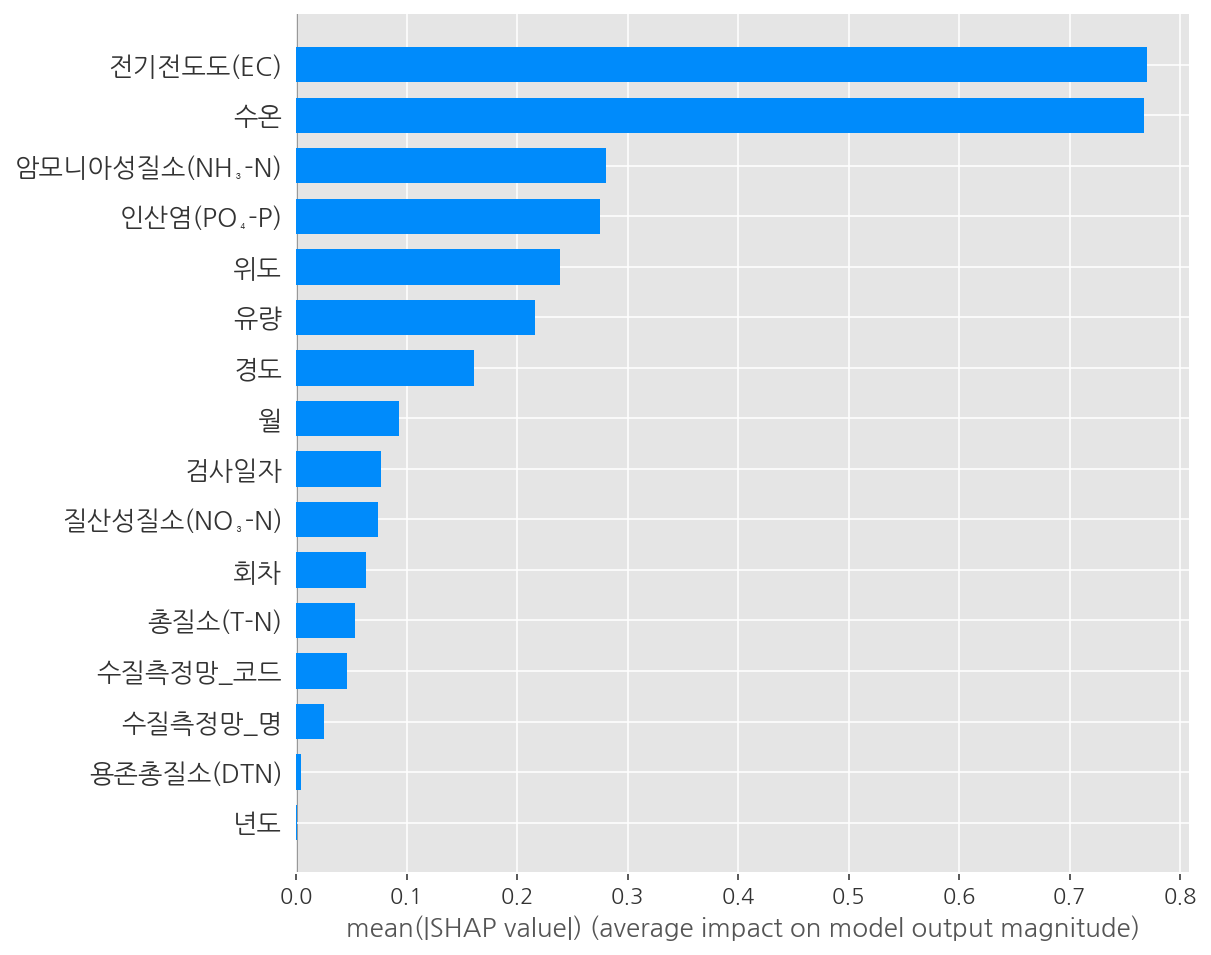

In [66]:
shap.summary_plot(shap_values, X_test2, plot_type="bar")

In [67]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc'

In [68]:
X_test2.shape

(35207, 16)

### 10. TP, TN, FP, FN 지도에 표시

In [69]:
TP = df_p[pred_True & right]
FP = df_p[pred_True & wrong]
TN = df_p[pred_False & right]
FN = df_p[pred_False & wrong]

In [70]:
TP.shape, TN.shape, FP.shape, FN.shape

((16259, 18), (12696, 18), (2271, 18), (3981, 18))

In [71]:
import folium 

m = folium.Map(location=[37, 127], zoom_start=7.2, tiles="Stamen Terrain")

TP['color'] = 'red'
TN['color'] = 'blue'
FP['color'] = 'green'
FN['color'] = 'yellow'

def mapping(x):
    folium.CircleMarker([x['위도'], x['경도']], radius=1, tooltip=x['수질측정망_명'],color=x['color'], fill=x['color'], fill_opacity = 100).add_to(m)

FP.sample(n=int(len(FP)/30), random_state=1).apply(mapping, axis=1)
FN.sample(n=int(len(FN)/30), random_state=1).apply(mapping, axis=1)
TN.sample(n=int(len(TN)/30), random_state=1).apply(mapping, axis=1)
TP.sample(n=int(len(TP)/30), random_state=1).apply(mapping, axis=1)
m

In [72]:
m = folium.Map(location=[37, 127], zoom_start=7.2, tiles="Stamen Terrain")

FN['color'] = 'red'

def mapping(x):
    folium.CircleMarker([x['위도'], x['경도']], radius=2, tooltip=x['수질측정망_명'],color=x['color'], fill=x['color'], fill_opacity = 100).add_to(m)

FN.sample(n=int(len(FN)/30)).apply(mapping, axis=1)

m

### 11. shap test

In [ ]:
!pip install shap

In [160]:
import pandas as pd
import numpy as np

# xgb 모델 사용
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap

encoder = OrdinalEncoder()
imputer = SimpleImputer()
model = XGBClassifier()

X_train2_encoded = encoder.fit_transform(X_train2)
X_test2_encoded = encoder.transform(X_test2)
X_train2_imputed = imputer.fit_transform(X_train2_encoded)
X_test2_imputed = imputer.transform(X_test2_encoded)
model.fit(X_train2_imputed, y_train)


XGBClassifier()

In [161]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test2_encoded)

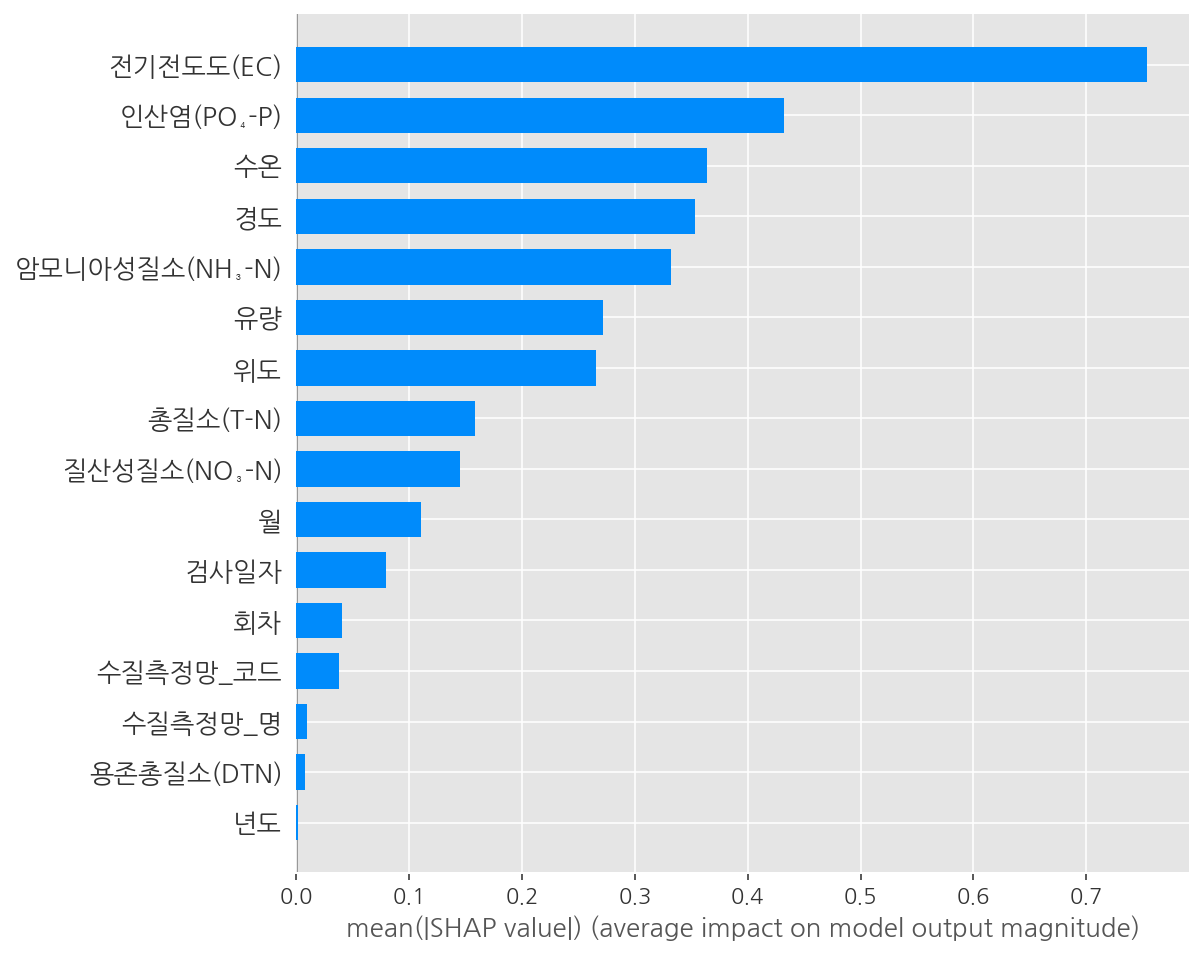

In [162]:
shap.summary_plot(shap_values, X_test2_encoded.iloc[:30], plot_type="bar")

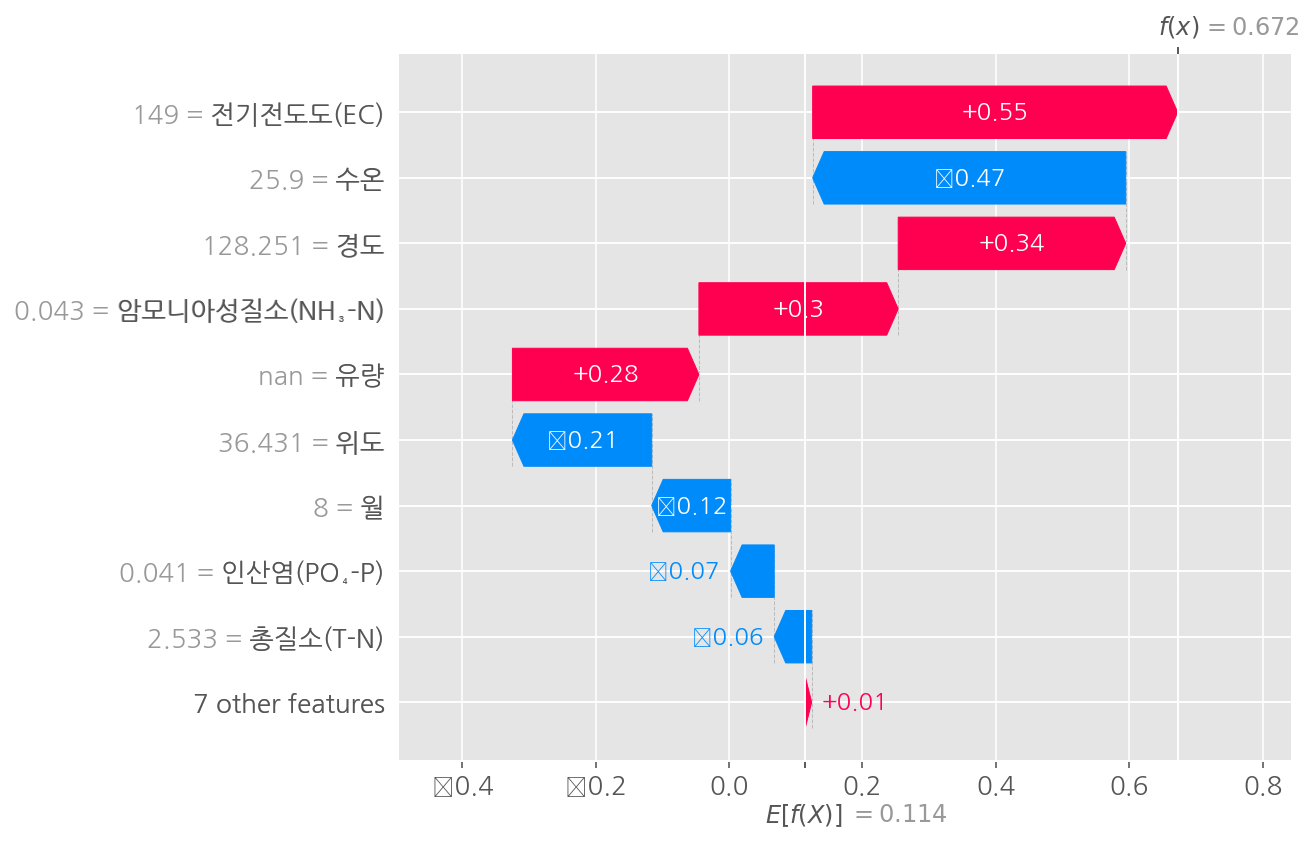

In [165]:
shap.initjs()
shap.plots.waterfall(shap_values[0])

In [166]:
X_test2.index

Int64Index([ 51752, 112799,  90597,  81224, 166857,  51062,  65635,  23567,
             69909, 181288,
            ...
            151323, 152155, 115094,  95184,  52521, 152205,  96615,  92011,
            139297,  10124],
           dtype='int64', length=35207)